In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [4]:

start = '2010-01-01'
end = '2019-12-31'
df = yf.download('SBIN.NS', start=start, end=end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,192.488800,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,192.560242,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,193.715378,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,192.631592,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,192.056152,10453820


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,227.500000,230.000000,227.500000,229.119995,192.488800,11031470
1,2010-01-05,230.800003,231.000000,228.009995,229.205002,192.560242,11613740
2,2010-01-06,229.699997,231.500000,228.500000,230.580002,193.715378,14527930
3,2010-01-07,230.600006,231.000000,228.110001,229.289993,192.631592,8576510
4,2010-01-08,229.399994,230.389999,228.009995,228.604996,192.056152,10453820


In [6]:
df = df.drop(columns=['Date','Adj Close'])
df.head()

,Open,High,Low,Close,Volume
0,227.500000,230.000000,227.500000,229.119995,11031470
1,230.800003,231.000000,228.009995,229.205002,11613740
2,229.699997,231.500000,228.500000,230.580002,14527930
3,230.600006,231.000000,228.110001,229.289993,8576510
4,229.399994,230.389999,228.009995,228.604996,10453820


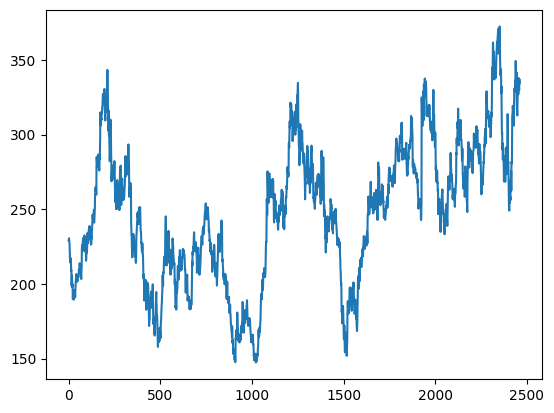

In [7]:
# closing price vs time chart
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2456    299.2080
2457    299.1095
2458    298.9820
2459    298.9165
2460    298.9850
Name: Close, Length: 2461, dtype: float64

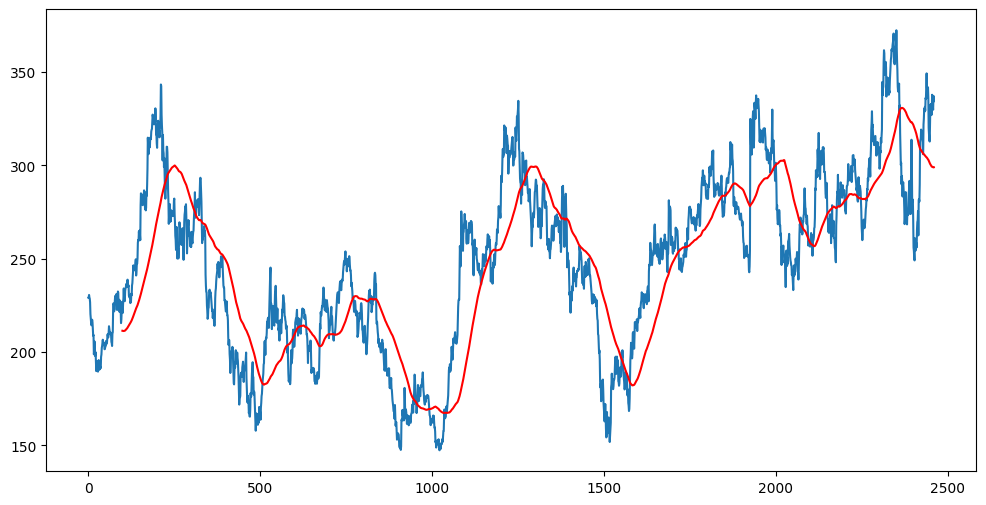

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2456    312.710249
2457    313.016749
2458    313.334249
2459    313.682249
2460    314.008999
Name: Close, Length: 2461, dtype: float64

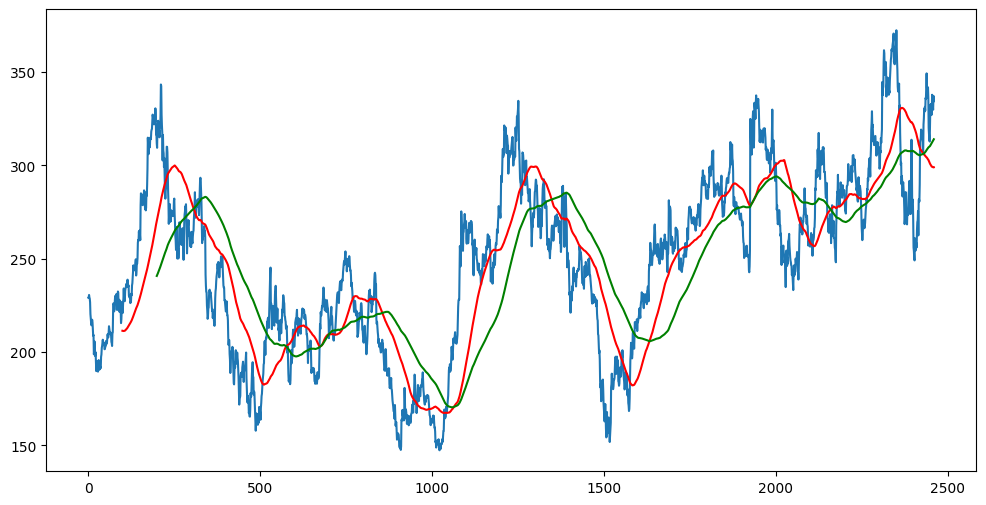

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2461, 5)

In [13]:
#split data (traning+tetsing)
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_train.shape)
print(data_test.shape)

(1722, 1)
(739, 1)


In [14]:
data_test.head()

,Close
1722,247.750000
1723,247.649994
1724,250.199997
1725,243.600006
1726,244.899994


In [15]:
data_train.head()

,Close
0,229.119995
1,229.205002
2,230.580002
3,229.289993
4,228.604996


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.41717475],
       [0.4176085 ],
       [0.42462434],
       ...,
       [0.51937645],
       [0.49411943],
       [0.51733551]])

In [18]:
data_train_array.shape

(1722, 1)

In [19]:
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])

x_train,y_train=np.array(x_train)  ,np.array(y_train)

In [20]:
x_train.shape

(1622, 100, 1)

In [21]:
#ML model

In [22]:
import tensorflow
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM,Dense,Dropout



In [23]:
model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 0.0947
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0163
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0113
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0097
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0095
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0096
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0089
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0074
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0072
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0075
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0071
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0072
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0066
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - loss: 0.0068
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - 

In [63]:
model.save('keras_model.h5')
data_test.head()

,Close
1722,247.750000
1723,247.649994
1724,250.199997
1725,243.600006
1726,244.899994


In [64]:
data_train.tail(100)

,Close
1622,227.300003
1623,228.050003
1624,226.649994
1625,225.649994
1626,232.750000
...,...
1717,255.350006
1718,249.800003
1719,249.149994
1720,244.199997


In [65]:
past_100_days=data_train.tail(100)
past_100_days

,Close
1622,227.300003
1623,228.050003
1624,226.649994
1625,225.649994
1626,232.750000
...,...
1717,255.350006
1718,249.800003
1719,249.149994
1720,244.199997


In [66]:
final_df=pd.concat([past_100_days, data_test], ignore_index=True)
final_df.head()

,Close
0,227.300003
1,228.050003
2,226.649994
3,225.649994
4,232.750000


In [67]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.01124367],
       [0.01635441],
       [0.00681431],
       [0.        ],
       [0.04838164],
       [0.0517888 ],
       [0.06473595],
       [0.03986376],
       [0.01022147],
       [0.12027263],
       [0.14378198],
       [0.14037483],
       [0.15502555],
       [0.22385013],
       [0.1986372 ],
       [0.19829646],
       [0.19591141],
       [0.1669506 ],
       [0.14275988],
       [0.15945492],
       [0.18126069],
       [0.18296427],
       [0.17955711],
       [0.19727436],
       [0.23475306],
       [0.28040882],
       [0.29097112],
       [0.2620103 ],
       [0.18466784],
       [0.21737645],
       [0.20681435],
       [0.19523005],
       [0.2044293 ],
       [0.19625215],
       [0.17376491],
       [0.2197615 ],
       [0.19693362],
       [0.17717206],
       [0.15911418],
       [0.19148215],
       [0.14718914],
       [0.17444638],
       [0.20204436],
       [0.23236801],
       [0.2398638 ],
       [0.21226572],
       [0.22521307],
       [0.210

In [68]:
input_data.shape

(839, 1)

In [69]:
x_test=[]
y_test=[]
for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [70]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(739, 100, 1)
(739,)


In [71]:
y_predicted=model.predict(x_test)
y_predicted.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


(739, 1)

In [72]:
y_test

array([0.15059629, 0.14991482, 0.16729133, 0.12231695, 0.13117547,
       0.11754685, 0.13424199, 0.13798978, 0.1458263 , 0.15434419,
       0.18057922, 0.17444638, 0.17206133, 0.20511077, 0.20681435,
       0.22282802, 0.22316865, 0.17308354, 0.19420784, 0.19931857,
       0.22862023, 0.27802397, 0.2609882 , 0.23645664, 0.30698479,
       0.32470183, 0.35366265, 0.3502555 , 0.3560477 , 0.35127781,
       0.34207845, 0.3454856 , 0.31345826, 0.30357764, 0.29505975,
       0.30562185, 0.29778543, 0.29982964, 0.30698479, 0.31788752,
       0.30528122, 0.29028965, 0.29676333, 0.31413973, 0.28381597,
       0.26848377, 0.30119259, 0.28722313, 0.30153322, 0.3243612 ,
       0.31618394, 0.33390119, 0.35229991, 0.36558769, 0.33049404,
       0.32879046, 0.31822836, 0.28517892, 0.29199323, 0.34650771,
       0.36661001, 0.38466789, 0.4279388 , 0.44565584, 0.46166951,
       0.45996593, 0.48858611, 0.45792172, 0.43475311, 0.43407163,
       0.46916529, 0.439523  , 0.44906299, 0.43781942, 0.44054

In [73]:
y_predicted

array([[0.15066235],
       [0.14097747],
       [0.13457188],
       [0.13198264],
       [0.13043965],
       [0.12880135],
       [0.12627475],
       [0.12358674],
       [0.12161049],
       [0.12107801],
       [0.12239364],
       [0.12694849],
       [0.13371763],
       [0.14052542],
       [0.14891505],
       [0.15837358],
       [0.16875656],
       [0.17841089],
       [0.18203291],
       [0.18124817],
       [0.17814912],
       [0.17615229],
       [0.18366629],
       [0.19747426],
       [0.20813334],
       [0.22222856],
       [0.24584138],
       [0.27943158],
       [0.3143431 ],
       [0.34074432],
       [0.35366294],
       [0.3530852 ],
       [0.34558165],
       [0.33153367],
       [0.31368783],
       [0.29432276],
       [0.2780413 ],
       [0.266675  ],
       [0.26063186],
       [0.2605333 ],
       [0.2684366 ],
       [0.27690834],
       [0.27783284],
       [0.273179  ],
       [0.26916564],
       [0.26308236],
       [0.2536482 ],
       [0.246

In [74]:
scaler.scale_

array([0.00681431])

In [75]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

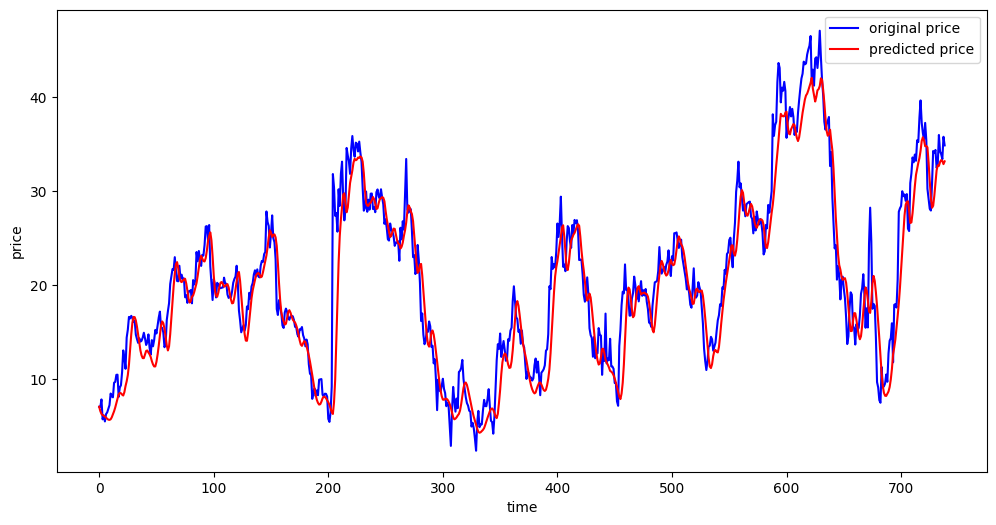

In [76]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show